## Activity 05
### Tyler Barna

In [3]:
## import modules (running on python 3.9.12)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pymc3 as pm
import random
import scipy as sp
import seaborn as sns


import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import lognorm
from scipy.stats import t

from sklearn.neighbors import KernelDensity as kd

## set seed for reproducibility
random.seed(5731) 

## import data 
df = pd.read_csv('planet_radii.csv')
df.head()

,Radius
0,1.37
1,2.19
2,1.24
3,2.08
4,1.40


Let's find some basic stats about the data

,Radius
count,1261.000000
mean,2.203620
std,1.869886
min,0.270000
25%,1.250000
50%,1.780000
75%,2.450000
max,16.100000


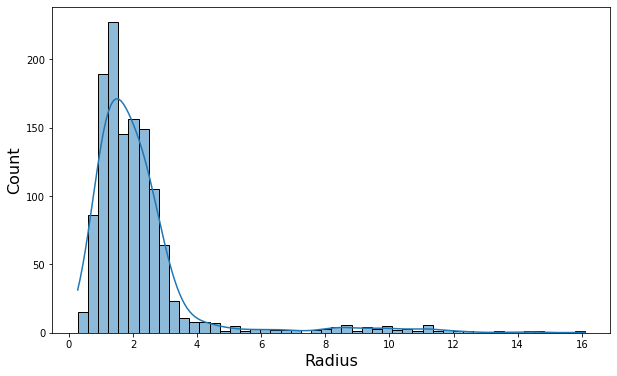

In [4]:
## find and print basic stats
display(df.describe())

## plot histogram
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
sns.histplot(df['Radius'], kde=True, bins=50, ax=ax)
plt.xlabel('Radius', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

For this analysis, the prior is taken to be simply $1/\lambda$ (which will be expanded upon in a moment), whereas the posterior is a t distribution. The likelihood is a log normal distribution

We use a joint prior $\nu(\mu, \lambda) = \nu(\mu) \nu(\lambda)$, where $\nu(\mu) = 1 $ and $\nu(\lambda) = 1/\lambda$. Here, $\lambda$ is the variance of the data. This means our prior is simply $\nu(\mu, \lambda) = 1/\lambda$. As a result of using this method, we are not able to conduct a prior predictive check or sensitivity analysis.

We should first find the variance of the data and then calculate this prior

In [5]:
## calculate the log of the radius
df['log_Radius'] = np.log(df['Radius'])
## find variance of the log of the radius
rad_var = df['log_Radius'].var()
print('Variance of the log of the radius: %s \n'%round(rad_var,2))

## define mu and lambda (can't use 'lambda' because it's a reserved word)
mu = 1 
lam = 1/rad_var

print('mu: %s'%mu)
print('lambda: %s'%round(lam,2))

## calculate the prior 
prior = mu * lam 
print('prior: %s'%round(prior,2))

Variance of the log of the radius: 0.32 

mu: 1
lambda: 3.1
prior: 3.1


Because we can't perform a prior predictive check or sensitivity analysis, we now proceed straight into finding the posterior, which is a t distribution

posterior: 0.6


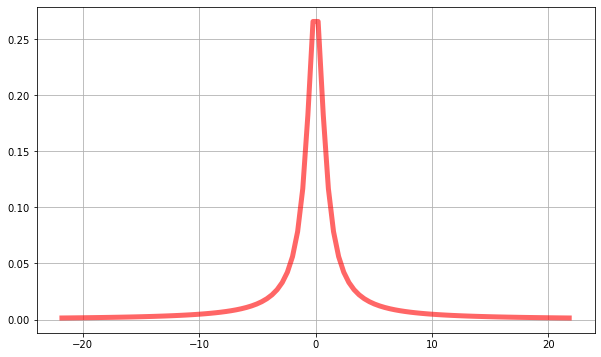

In [16]:
## calculate the posterior
posterior = df['log_Radius'].mean()
print('posterior: %s'%round(posterior,2))

## calculate the distribution of the posterior
x = np.linspace(t.ppf(0.05, posterior), 
                t.ppf(0.95, posterior), 
                100)
pdf = t.pdf(x, posterior)

## plot the distribution of the posterior
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
ax.plot(x, pdf, 'r-', lw=5, alpha=0.6, label='t pdf')
ax.grid()

plt.show();